# Personality Type Classification with Naïve Bayes

A startup company on social media is looking for ideas to improve the user satisfaction on the products. Seen the rivalry and lack of founding, the startup wants to impress everyone by providing services in the future based on personality type of users.

<img src = "https://cdn.startupsavant.com/images/startup-culture/articles/social-media-guide-101-for-your-startup-and-top-resources.jpg" alttext = "social_media" height = "200">

**Motivation 🏃**

The development team was asked to implement a classication system to classify the personality types of the users. Despite being unethical, the founder enforces the developers find a way to categorize its users into 16 categories using the Myers-Briggs Type indicator. As a kickoff, the company will focus on these four personality types: 

* Introversion, Intuition, Feeling, Perceiving (INFP)
* Introversion, Intution, Feeling, Judging (INFJ)
* Introversion, Intution, Thinking, Perceiving (INTP)
* Introversion, Intuition, Thinking, Judging (INTJ)

**Target 🎯**

Train a machine learning model to classify personality types with Naive Bayes based with a prepared dataset including a paragraph and identified personality types.

# Importing libraires 🏇

In [73]:
import pandas as pd
import numpy as np

#loading sklearn libs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

#loading plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [74]:
db_v1 = 'https://drive.google.com/file/d/1fLYe8xLtPG-j6TZuZdYAabm67LRgLfXu/view?usp=share_link' #dataset with paragraphs + personality types

#let's load the version 4 with all data
fname1 = db_v1 
fname1='https://drive.google.com/uc?id=' + fname1.split('/')[-2]

df = pd.read_csv(fname1, encoding = "ISO-8859-1")
df.head()

,CLASS,CONTENT
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,INTP,'Good one _____ https://www.youtube.com/wat...
2,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
3,INTJ,'18/37 @.@|||Science is not perfect. No scien...
4,INFJ,"'No, I can't draw on my own nails (haha). Thos..."


In [75]:
df['CLASS'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
Name: CLASS, dtype: int64

## PREPROCESSING 🎣

**Splitting Train and Test**

In [76]:
#selection of inputs and target
X = df['CONTENT']
Y = df['CLASS']

In [77]:
Y.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
Name: CLASS, dtype: int64

In [78]:
#splitting arrays into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size= 0.2, 
                                                    random_state = 7,
                                                    stratify = Y)

In [81]:
print('Train\n',Y_train.value_counts(),'\n\nTest\n',Y_test.value_counts())

Train
 INFP    1465
INFJ    1176
INTP    1043
INTJ     873
Name: CLASS, dtype: int64 

Test
 INFP    367
INFJ    294
INTP    261
INTJ    218
Name: CLASS, dtype: int64


**Vectorizer - Tokenizing comments**

In [82]:
#tokenizing the words in the comments after splitting.
#so that the comments in train set are not learnt by tokenizer.
vectorizer = CountVectorizer()

In [83]:
#fitting + transforming X_train
#transforming X_test
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [84]:
X_train_tf.shape

(4557, 98991)

#Naive Bayes classifier

We have a variety of classifiers  

Two models below are best suited for text classification. Imblanced dataset are better handled.  
1 - *Multinomial*  
2 - *Complement*  

##**Model 1-Defining MultinomialNB**

In [85]:
#first let's use multinominal NB
clf = MultinomialNB()

In [86]:
clf.fit(X_train_tf, Y_train)

MultinomialNB()

In [87]:
#alpha: smoothing parameters
#class_prior: specific values for prior probabilities
#fit_prior: boolean, priors are uniform by default.
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [88]:
#predicting test data
Y_test_pred = clf.predict(X_test_tf)

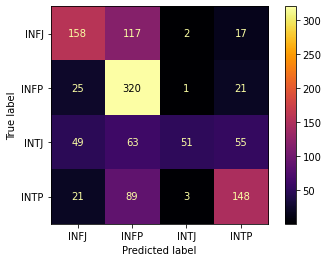

In [89]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    Y_test, Y_test_pred,
    labels = clf.classes_,
    cmap= 'inferno'
)

In [90]:
#Let's check other metrics
print(classification_report(Y_test, Y_test_pred, target_names = ['INFJ','INFP','INTJ','INTP']))


              precision    recall  f1-score   support

        INFJ       0.62      0.54      0.58       294
        INFP       0.54      0.87      0.67       367
        INTJ       0.89      0.23      0.37       218
        INTP       0.61      0.57      0.59       261

    accuracy                           0.59      1140
   macro avg       0.67      0.55      0.55      1140
weighted avg       0.65      0.59      0.57      1140



**Predictions**

In [91]:
X_test0 = ["Such feelings are not surprising, you are allowed to be crossed."]
X_test0_tf = vectorizer.transform(X_test0)
#predicting test data
clf.predict(X_test0_tf)

array(['INFJ'], dtype='<U4')

##**Model 2-Defining ComplementNB**

In [92]:
#first let's use multinominal NB
clf2 = ComplementNB()

In [93]:
clf2.fit(X_train_tf, Y_train)

ComplementNB()

In [94]:
#alpha: smoothing parameters
#class_prior: specific values for prior probabilities
#fit_prior: boolean, priors are uniform by default.
clf2.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'norm': False}

In [95]:
#predicting test data
Y_test_pred = clf2.predict(X_test_tf)

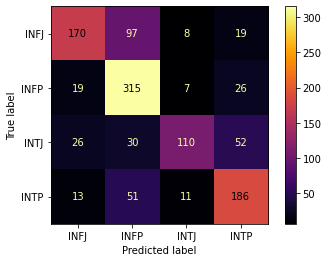

In [96]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    Y_test, Y_test_pred,
    labels = clf.classes_,
    cmap= 'inferno'
)

In [97]:
#Let's check other metrics
print(classification_report(Y_test, Y_test_pred, target_names = ['INFJ','INFP','INTJ','INTP']))


              precision    recall  f1-score   support

        INFJ       0.75      0.58      0.65       294
        INFP       0.64      0.86      0.73       367
        INTJ       0.81      0.50      0.62       218
        INTP       0.66      0.71      0.68       261

    accuracy                           0.69      1140
   macro avg       0.71      0.66      0.67      1140
weighted avg       0.70      0.69      0.68      1140



**Predictions**

In [98]:
X_test0 = ["Such feelings are not surprising, you are allowed to be crossed."]
X_test0_tf = vectorizer.transform(X_test0)
#predicting test data
clf2.predict(X_test0_tf)

array(['INFJ'], dtype='<U4')

#Results and Conclusion

In a social-media startup company, the team needed to implement a classication system to classify the personality types of the users. Two Naive Bates models (Model 1 - Multinominal and Model 2 - Complement) were trained to classify following four personality types for a given text:

* Introversion, Intuition, Feeling, Perceiving (INFP)
* Introversion, Intution, Feeling, Judging (INFJ)
* Introversion, Intution, Thinking, Perceiving (INTP)
* Introversion, Intuition, Thinking, Judging (INTJ)


We can observe the followings: 
1 - The accuracy of Model 2 is higher than the accuracy of Model 1. 

2 - The recall value in Model 2  has increased compared to the Model 1.

3 - F1 scores in Model 2 are greater than F1 scores in Model 1.

**We can conclude that Model 2 - Complement Navie Bayes Classification works better in classificaiton of personality types given a paragraph text.** 


--- End of NoteBook ---
#END